In [17]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

# EXTERNAL VALIDATION OVER PRUEBAS

In [18]:
path = '/home/mr1142/Documents/Data/global_pneumonia_validation/val'
real = pd.read_csv(os.path.join(path, 'results_comparation.csv'))

In [19]:
prueba = [i for i in real.index if bool(re.search('prueba', real.name[i]))]
completo = [i for i in real.index if not bool(re.search('prueba', real.name[i]))]

In [20]:
real = real.iloc[prueba]

## Extraer variables

In [59]:
real['fine'] = [int(re.split('_', real.name[i])[-4][-2:])/10 for i in real.index]
real['fine'] = [1 if real.fine[i] == 0 else real.fine[i] for i in real.index]
real['lr'] = [re.split('_', real.name[i])[-2][3:] for i in real.index]
real['lr'] = [1e-5 if real.lr[i] == '-05' else float('0.' + real.lr[i]) for i in real.index]
real['auc_internal'] = [float(real.name[i][-2:])/100 for i in real.index]

In [60]:
real['mask'] = [1 if bool(re.search('mask', real.name[i])) else 0 for i in real.index]
real['modelo'] = ['EffNet' if bool(re.search('EffNet', real.name[i])) else 'Xception' if bool(re.search('Xception', real.name[i])) else 'IncResNet' for i in real.index]

In [68]:
real[['auc', 'auc_internal']].sort_values('auc_internal').tail(20)

,auc,auc_internal
74,0.840501,0.92
62,0.817342,0.92
68,0.723393,0.92
26,0.855300,0.92
54,0.715080,0.92
19,0.822688,0.92
22,0.864081,0.92
42,0.813166,0.93
23,0.819108,0.93
47,0.832495,0.93


In [7]:
real.sort_values('auc')

,name,auc,younden,pr_max,pr_cut,f1_score_younden,precision_score_younden,recall_score_younden,accuracy_score_younden,f1_score_pr_max,...,accuracy_score_0.5,f1_score_max,precision_score_max,recall_score_max,accuracy_score_max,fine,lr,auc_internal,mask,modelo
88,prueba_mask_EffNet3_fine-00_batch-8_lr--05_auc-51,0.421549,0.305094,0.304370,0,0.283292,0.608072,0.447238,0.447238,0.279383,...,0.556070,0.397429,0.309214,0.556070,0.556070,1.0,0.00001,0.51,1,EffNet
46,prueba_EffNet3_fine-08_batch-8_lr-0001_auc-57,0.489762,0.373283,0.346258,0,0.455433,0.560087,0.563182,0.563182,0.273331,...,0.556070,0.528836,0.529643,0.539696,0.539696,0.8,0.00010,0.57,0,EffNet
86,prueba_EffNet3_fine-08_batch-8_lr--05_auc-56,0.550674,0.283742,0.211669,0,0.543536,0.552626,0.542507,0.542507,0.273331,...,0.556070,0.397345,0.372438,0.555243,0.555243,0.8,0.00001,0.56,0,EffNet
63,prueba_EffNet3_fine-00_batch-8_lr-0001_auc-84,0.553769,0.310031,0.003239,0,0.546383,0.550122,0.544988,0.544988,0.273331,...,0.554912,0.543989,0.543057,0.545650,0.545650,1.0,0.00010,0.84,0,EffNet
90,prueba_mask_EffNet3_fine-00_batch-8_lr-001_auc-53,0.556769,0.294312,0.294300,0,0.499629,0.578634,0.526133,0.526133,0.318515,...,0.556070,0.397429,0.309214,0.556070,0.556070,1.0,0.00100,0.53,1,EffNet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,prueba_mask_Xception_fine-05_batch-8_lr-0001_a...,0.877097,0.248858,0.052796,0,0.789854,0.790296,0.789613,0.789613,0.728906,...,0.774727,0.770193,0.781317,0.775058,0.775058,0.5,0.00010,0.91,1,Xception
43,prueba_mask_Xception_fine-00_batch-8_lr-0001_a...,0.877530,0.279207,0.067446,0,0.799799,0.801147,0.799371,0.799371,0.763528,...,0.789613,0.793321,0.793451,0.793913,0.793913,1.0,0.00010,0.90,1,Xception
78,prueba_mask_IncResNet_fine-05_batch-8_lr-001_a...,0.878872,0.166895,0.092253,0,0.787851,0.807077,0.787794,0.787794,0.756885,...,0.788290,0.788291,0.788546,0.788124,0.788124,0.5,0.00100,0.90,1,IncResNet
16,prueba_mask_Xception_fine-03_batch-8_lr-0001_a...,0.881758,0.239800,0.078482,0,0.797364,0.797578,0.797221,0.797221,0.746527,...,0.782335,0.779029,0.791676,0.783989,0.783989,0.3,0.00010,0.91,1,Xception


In [8]:
p = '/home/mr1142/Documents/Data/models/neumonia'
modelos = os.listdir(p)
modelos = [modelo[:-3] for modelo in modelos if os.path.isfile(os.path.join(p, modelo))]
modelos = [modelo for modelo in modelos if not bool(re.search('completo', modelo))]
modelos_evaluados = list(real['name'])

In [9]:
set(modelos)-set(modelos_evaluados)

set()

In [10]:
set(modelos_evaluados)-set(modelos)

set()

In [11]:
y = 'auc'
data = real
lim = np.percentile(data[y], 20)

[(0.5, 1.0)]

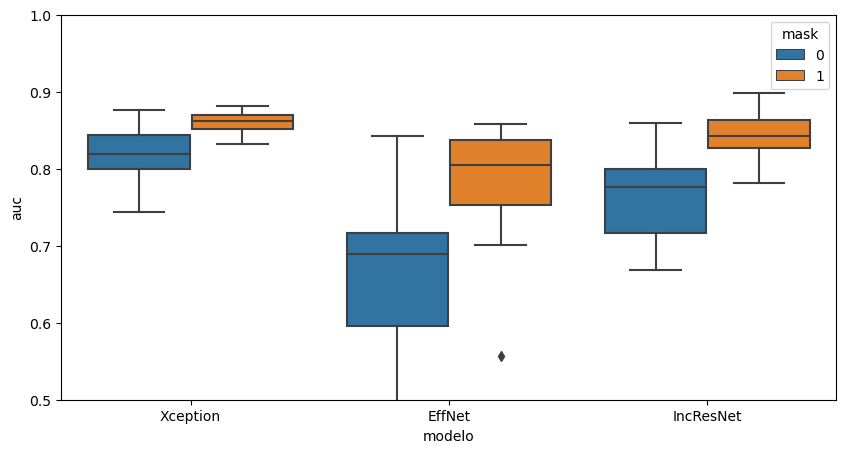

In [12]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(0.5, 1))

[(0.5, 1.0)]

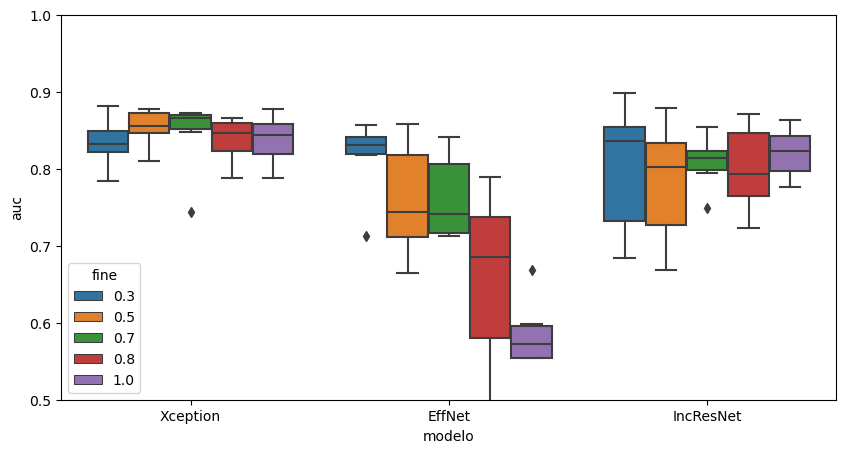

In [13]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(0.5, 1))

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


[(0.5, 1.0)]

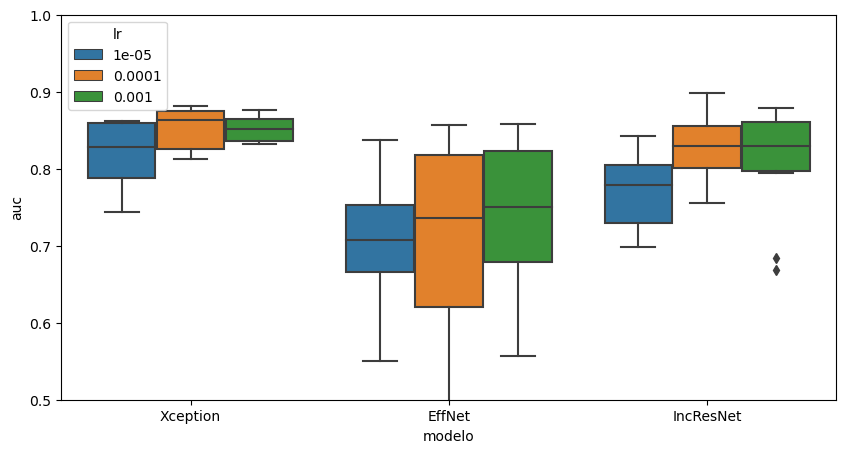

In [14]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="lr",
                data=data)
p.set(ylim=(0.5, 1))

[(0.5, 1.0)]

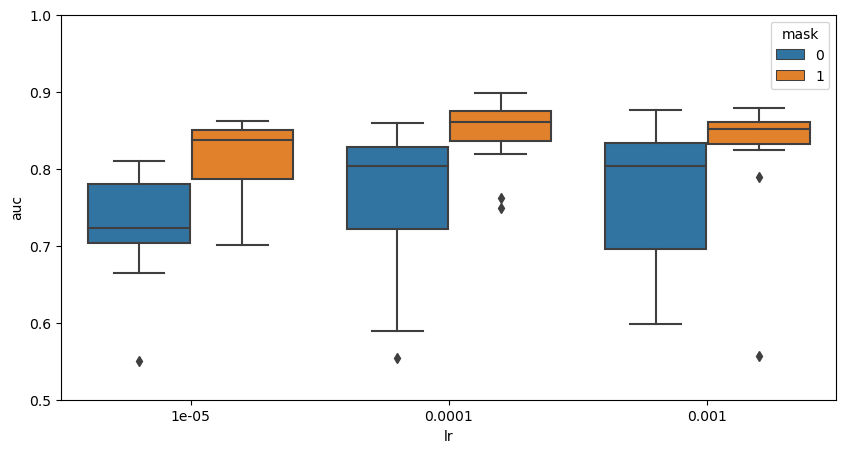

In [15]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(0.5, 1))

[(0.5, 1.0)]

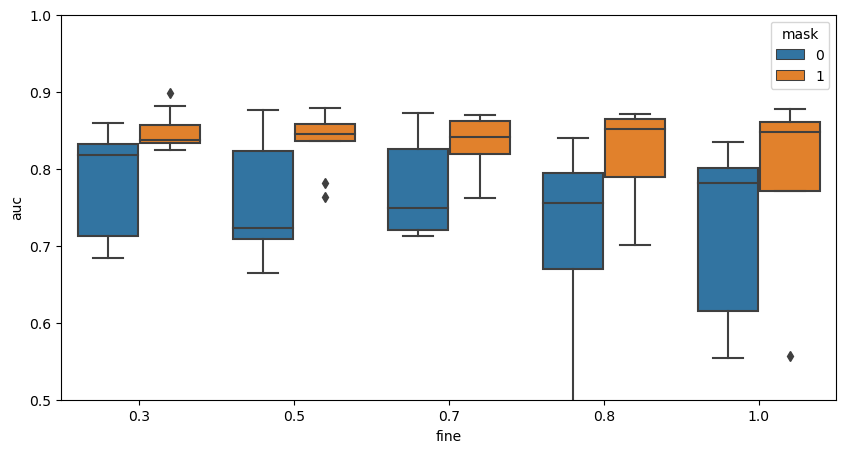

In [16]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="mask",
                data=data)
p.set(ylim=(0.5, 1))

[(0.7145311276819648, 1.0)]

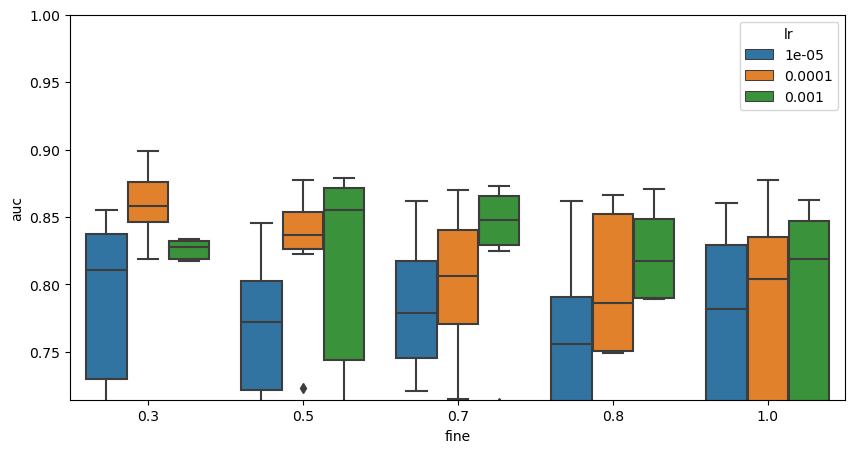

In [17]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

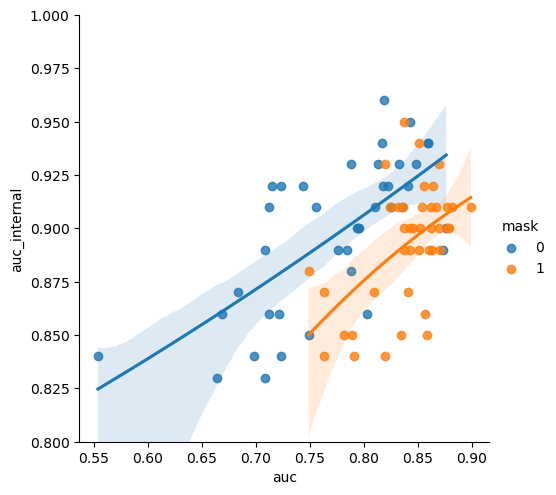

In [18]:
# plt.subplots(figsize=(10,5))
data = real[real.auc_internal > 0.6]
p = sns.lmplot(x="auc", y='auc_internal',
               hue= 'mask',
                data=data, order = 2)
p.set(ylim=(0.8, 1))

In [19]:
# real.to_csv(os.path.join(path, 'results_comparation.csv'), index = False)

# Modelo para predecir auc externa

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

2022-10-05 11:37:17.861763: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
df = real

In [22]:
df.columns

Index(['name', 'auc', 'younden', 'pr_max', 'pr_cut', 'f1_score_younden',
       'precision_score_younden', 'recall_score_younden',
       'accuracy_score_younden', 'f1_score_pr_max', 'precision_score_pr_max',
       'recall_score_pr_max', 'accuracy_score_pr_max', 'f1_score_pr_cut',
       'precision_score_pr_cut', 'recall_score_pr_cut',
       'accuracy_score_pr_cut', 'f1_score_0.5', 'precision_score_0.5',
       'recall_score_0.5', 'accuracy_score_0.5', 'f1_score_max',
       'precision_score_max', 'recall_score_max', 'accuracy_score_max', 'fine',
       'lr', 'auc_internal', 'mask', 'modelo'],
      dtype='object')

In [23]:
df['modelo'], uniques_backbone = pd.factorize(df['modelo'])
df['mask'], uniques_mask = pd.factorize(df['mask'])

In [253]:
os.environ['CUDA_VISIBLE_DEVICES'] = str(3)

In [255]:
model = keras.Sequential(
    [
        layers.Dense(3, input_shape = (4,), activation="relu", name="layer1"),
        layers.Dense(2, activation="relu", name="layer3"),
        layers.Dense(1, activation='sigmoid', name="last"),
    ]
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-5), 
                    loss = 'mean_absolute_error',
                    metrics = ['mean_squared_error', 'mean_absolute_error'])

2022-10-04 12:31:59.865978: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 12:32:00.522099: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10405 MB memory:  -> device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:0a:00.0, compute capability: 6.1


In [256]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 15        
                                                                 
 layer3 (Dense)              (None, 2)                 8         
                                                                 
 last (Dense)                (None, 1)                 3         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [258]:
X = np.array(df[['modelo', 'mask', 'lr', 'fine']])
y = np.array(df['auc'])

In [259]:
len(y)

90

In [269]:
history = model.fit(X, y,
                    batch_size = 10,
                    epochs = 100,
                    validation_split = 0.2,
                   verbose = 0)

In [270]:
min(history.history['val_loss'])

0.10541203618049622

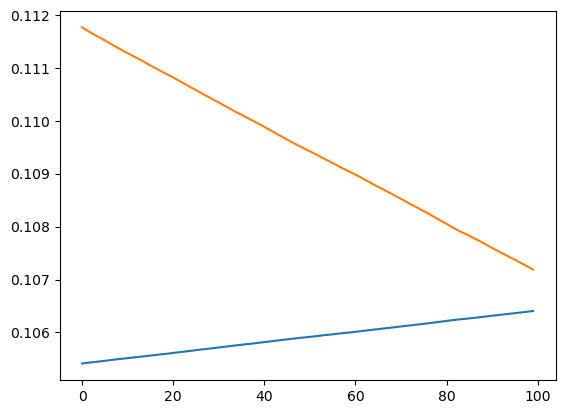

In [271]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

## Tuning from model

In [272]:
from mango import Tuner, scheduler
from scipy.stats import uniform

/home/mr1142/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [290]:
param_space = dict(modelo= range(3),
                    fine = uniform(0,1),
                    lr= uniform(1e-5, 1e-3),
                    mask = range(2))

In [291]:
@scheduler.serial
def objective(**params):
    print('--------NEW COMBINATION--------')
    print(params)
    combination = np.expand_dims(np.array([params['modelo'],params['mask'],params['lr'],params['fine']]),0)
    prediction = model.predict(combination)[0][0]
    return prediction

In [292]:
conf_dict = dict(num_iteration=50)

In [296]:
tuner = Tuner(param_space, objective, conf_dict)
results = tuner.maximize()

--------NEW COMBINATION--------
{'fine': 0.7066720852471984, 'lr': 0.00042392331062630976, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 17ms/step
--------NEW COMBINATION--------
{'fine': 0.190717021994263, 'lr': 0.00024736346893210973, 'mask': 1, 'modelo': 0}
1/1 [==============================] - 0s 16ms/step


  0%|                                                                         | 0/50 [00:00<?, ?it/s]

--------NEW COMBINATION--------
{'fine': 0.14371264314398946, 'lr': 0.0006653049294603925, 'mask': 0, 'modelo': 0}
1/1 [==============================] - 0s 15ms/step


Best score: 0.81594205:   2%|▊                                        | 1/50 [00:00<00:16,  3.02it/s]

--------NEW COMBINATION--------
{'fine': 0.516073947417172, 'lr': 0.0009484315344370732, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 15ms/step


Best score: 0.81594205:   4%|█▋                                       | 2/50 [00:00<00:10,  4.79it/s]

--------NEW COMBINATION--------
{'fine': 0.6712719807289848, 'lr': 6.391242856901035e-05, 'mask': 1, 'modelo': 0}
1/1 [==============================] - 0s 17ms/step


Best score: 0.81594205:   6%|██▍                                      | 3/50 [00:00<00:08,  5.34it/s]

--------NEW COMBINATION--------
{'fine': 0.12277669803938274, 'lr': 0.0006089689844796352, 'mask': 0, 'modelo': 1}
1/1 [==============================] - 0s 18ms/step


Best score: 0.81594205:   8%|███▎                                     | 4/50 [00:00<00:07,  5.78it/s]

--------NEW COMBINATION--------
{'fine': 0.9211931863453614, 'lr': 0.0009932558330999928, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 19ms/step


Best score: 0.82280636:  10%|████                                     | 5/50 [00:00<00:07,  6.18it/s]

--------NEW COMBINATION--------
{'fine': 0.6482244668786846, 'lr': 0.00013632903627743353, 'mask': 0, 'modelo': 0}
1/1 [==============================] - 0s 17ms/step


Best score: 0.82280636:  12%|████▉                                    | 6/50 [00:01<00:06,  6.54it/s]

--------NEW COMBINATION--------
{'fine': 0.8054173998317247, 'lr': 0.000676261050400409, 'mask': 0, 'modelo': 1}
1/1 [==============================] - 0s 30ms/step


Best score: 0.82280636:  14%|█████▋                                   | 7/50 [00:01<00:10,  4.30it/s]

--------NEW COMBINATION--------
{'fine': 0.9999153262531808, 'lr': 0.0005166693504929763, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 25ms/step


Best score: 0.8253078:  16%|██████▋                                   | 8/50 [00:01<00:09,  4.44it/s]

--------NEW COMBINATION--------
{'fine': 0.08979410425823275, 'lr': 0.0001406143099892202, 'mask': 1, 'modelo': 0}
1/1 [==============================] - 0s 15ms/step


Best score: 0.8253078:  18%|███████▌                                  | 9/50 [00:01<00:07,  5.20it/s]

--------NEW COMBINATION--------
{'fine': 0.9990564041944622, 'lr': 8.379930716030292e-05, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 29ms/step


Best score: 0.8253078:  20%|████████▏                                | 10/50 [00:02<00:08,  4.90it/s]

--------NEW COMBINATION--------
{'fine': 0.2622100639136875, 'lr': 0.000719695613716607, 'mask': 1, 'modelo': 1}
1/1 [==============================] - 0s 18ms/step


Best score: 0.8253078:  22%|█████████                                | 11/50 [00:02<00:07,  5.17it/s]

--------NEW COMBINATION--------
{'fine': 0.3597509352890218, 'lr': 4.029486655619673e-05, 'mask': 0, 'modelo': 1}
1/1 [==============================] - 0s 18ms/step


Best score: 0.8253078:  24%|█████████▊                               | 12/50 [00:02<00:09,  4.09it/s]

--------NEW COMBINATION--------
{'fine': 0.9980725264530299, 'lr': 0.00019136510577668698, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 28ms/step


Best score: 0.8253078:  26%|██████████▋                              | 13/50 [00:02<00:09,  4.02it/s]

--------NEW COMBINATION--------
{'fine': 0.9992329076049508, 'lr': 0.0009303045515879746, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 27ms/step


Best score: 0.8253078:  28%|███████████▍                             | 14/50 [00:03<00:09,  3.77it/s]

--------NEW COMBINATION--------
{'fine': 0.7192106907074066, 'lr': 0.0005713902953982627, 'mask': 1, 'modelo': 1}
1/1 [==============================] - 0s 16ms/step


Best score: 0.8253078:  30%|████████████▎                            | 15/50 [00:03<00:07,  4.47it/s]

--------NEW COMBINATION--------
{'fine': 0.4647929070553741, 'lr': 0.0005971743162999671, 'mask': 0, 'modelo': 1}
1/1 [==============================] - 0s 18ms/step


Best score: 0.8253078:  32%|█████████████                            | 16/50 [00:03<00:06,  5.04it/s]

--------NEW COMBINATION--------
{'fine': 0.9973500228344939, 'lr': 0.0006049153676751295, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 27ms/step


Best score: 0.8253078:  34%|█████████████▉                           | 17/50 [00:03<00:07,  4.62it/s]

--------NEW COMBINATION--------
{'fine': 0.9967157580801803, 'lr': 0.00022273104635102913, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 45ms/step


Best score: 0.8253078:  36%|██████████████▊                          | 18/50 [00:04<00:09,  3.22it/s]

--------NEW COMBINATION--------
{'fine': 0.9959220309550095, 'lr': 0.0005175368165953281, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 25ms/step


Best score: 0.8253078:  38%|███████████████▌                         | 19/50 [00:04<00:09,  3.22it/s]

--------NEW COMBINATION--------
{'fine': 0.9943559592472565, 'lr': 0.00019208337474622983, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 22ms/step


Best score: 0.8253078:  40%|████████████████▍                        | 20/50 [00:04<00:09,  3.22it/s]

--------NEW COMBINATION--------
{'fine': 0.9949738841376433, 'lr': 0.0008592480067058451, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 25ms/step


Best score: 0.8253078:  42%|█████████████████▏                       | 21/50 [00:05<00:09,  3.10it/s]

--------NEW COMBINATION--------
{'fine': 0.9953066175861496, 'lr': 9.479995998220991e-05, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 24ms/step


Best score: 0.8253078:  44%|██████████████████                       | 22/50 [00:05<00:08,  3.21it/s]

--------NEW COMBINATION--------
{'fine': 0.993070214588864, 'lr': 4.1855773932195076e-05, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 25ms/step


Best score: 0.8253078:  46%|██████████████████▊                      | 23/50 [00:05<00:10,  2.55it/s]

--------NEW COMBINATION--------
{'fine': 0.4600152439987374, 'lr': 8.532872511184364e-05, 'mask': 1, 'modelo': 1}
1/1 [==============================] - 0s 15ms/step


Best score: 0.8253078:  48%|███████████████████▋                     | 24/50 [00:06<00:08,  3.17it/s]

--------NEW COMBINATION--------
{'fine': 0.9936437430901538, 'lr': 0.0008600489411072506, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 23ms/step


Best score: 0.8253078:  50%|████████████████████▌                    | 25/50 [00:06<00:08,  3.12it/s]

--------NEW COMBINATION--------
{'fine': 0.9920663756360595, 'lr': 2.4009650783231246e-05, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 25ms/step


Best score: 0.8253078:  52%|█████████████████████▎                   | 26/50 [00:06<00:07,  3.13it/s]

--------NEW COMBINATION--------
{'fine': 0.9926946382415024, 'lr': 0.0010024045998513725, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 20ms/step


Best score: 0.8253078:  54%|██████████████████████▏                  | 27/50 [00:07<00:07,  3.15it/s]

--------NEW COMBINATION--------
{'fine': 0.9915758028941559, 'lr': 0.0005359834271927765, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 17ms/step


Best score: 0.8253078:  56%|██████████████████████▉                  | 28/50 [00:07<00:08,  2.52it/s]

--------NEW COMBINATION--------
{'fine': 0.8543025980015484, 'lr': 0.0007267775059115141, 'mask': 0, 'modelo': 2}
1/1 [==============================] - 0s 20ms/step


Best score: 0.8253078:  58%|███████████████████████▊                 | 29/50 [00:07<00:06,  3.12it/s]

--------NEW COMBINATION--------
{'fine': 0.9909371311245385, 'lr': 6.835064524942225e-05, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 28ms/step


Best score: 0.8253078:  60%|████████████████████████▌                | 30/50 [00:08<00:06,  2.94it/s]

--------NEW COMBINATION--------
{'fine': 0.9900669537911835, 'lr': 0.0002869658553239885, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 16ms/step


Best score: 0.8253078:  62%|█████████████████████████▍               | 31/50 [00:08<00:08,  2.26it/s]

--------NEW COMBINATION--------
{'fine': 0.7498708727199733, 'lr': 0.0001778344868591225, 'mask': 1, 'modelo': 1}
1/1 [==============================] - 0s 20ms/step


Best score: 0.8253078:  64%|██████████████████████████▏              | 32/50 [00:09<00:07,  2.31it/s]

--------NEW COMBINATION--------
{'fine': 0.9887430438245677, 'lr': 2.786473248351284e-05, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 18ms/step


Best score: 0.8253078:  66%|███████████████████████████              | 33/50 [00:10<00:10,  1.70it/s]

--------NEW COMBINATION--------
{'fine': 0.989212045213637, 'lr': 0.0008137410590982547, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 15ms/step


Best score: 0.8253078:  68%|███████████████████████████▉             | 34/50 [00:10<00:09,  1.70it/s]

--------NEW COMBINATION--------
{'fine': 0.9907466669800548, 'lr': 0.0008946734110933013, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 16ms/step


Best score: 0.8253078:  70%|████████████████████████████▋            | 35/50 [00:11<00:11,  1.34it/s]

--------NEW COMBINATION--------
{'fine': 0.9878225881922371, 'lr': 0.0001357980863466146, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 20ms/step


Best score: 0.8253078:  72%|█████████████████████████████▌           | 36/50 [00:13<00:12,  1.08it/s]

--------NEW COMBINATION--------
{'fine': 0.9865216255703294, 'lr': 3.187277283109157e-05, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 34ms/step


Best score: 0.8253078:  74%|██████████████████████████████▎          | 37/50 [00:14<00:13,  1.05s/it]

--------NEW COMBINATION--------
{'fine': 0.988334156938695, 'lr': 0.0006651917466937594, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 15ms/step


Best score: 0.8253078:  76%|███████████████████████████████▏         | 38/50 [00:15<00:11,  1.09it/s]

--------NEW COMBINATION--------
{'fine': 0.9871887874121095, 'lr': 0.0006137862408809414, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 23ms/step


Best score: 0.8253078:  78%|███████████████████████████████▉         | 39/50 [00:15<00:08,  1.26it/s]

--------NEW COMBINATION--------
{'fine': 0.9856096807348419, 'lr': 0.00021606006965511402, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 21ms/step


Best score: 0.8253078:  80%|████████████████████████████████▊        | 40/50 [00:16<00:07,  1.31it/s]

--------NEW COMBINATION--------
{'fine': 0.9861868371872978, 'lr': 0.0007582737620559017, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 15ms/step


Best score: 0.8253078:  82%|█████████████████████████████████▌       | 41/50 [00:17<00:07,  1.18it/s]

--------NEW COMBINATION--------
{'fine': 0.9847534622511404, 'lr': 0.00039849332303983466, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 30ms/step


Best score: 0.8253078:  84%|██████████████████████████████████▍      | 42/50 [00:18<00:07,  1.03it/s]

--------NEW COMBINATION--------
{'fine': 0.9839687142218089, 'lr': 3.8935307877659415e-05, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 32ms/step


Best score: 0.8253078:  86%|███████████████████████████████████▎     | 43/50 [00:20<00:07,  1.07s/it]

--------NEW COMBINATION--------
{'fine': 0.9831082865882625, 'lr': 0.0004650124902137055, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 16ms/step


Best score: 0.8253078:  88%|████████████████████████████████████     | 44/50 [00:20<00:05,  1.04it/s]

--------NEW COMBINATION--------
{'fine': 0.9820688539093613, 'lr': 0.00018139927071185135, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 19ms/step


Best score: 0.8253078:  90%|████████████████████████████████████▉    | 45/50 [00:21<00:04,  1.03it/s]

--------NEW COMBINATION--------
{'fine': 0.9837440894862448, 'lr': 0.0008364498327991561, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 15ms/step


Best score: 0.8253078:  92%|█████████████████████████████████████▋   | 46/50 [00:22<00:03,  1.01it/s]

--------NEW COMBINATION--------
{'fine': 0.6855254626309699, 'lr': 0.0007484267730467172, 'mask': 1, 'modelo': 0}
1/1 [==============================] - 0s 36ms/step


Best score: 0.8253078:  94%|██████████████████████████████████████▌  | 47/50 [00:22<00:02,  1.36it/s]

--------NEW COMBINATION--------
{'fine': 0.9813467089196939, 'lr': 0.0004908005626015942, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 15ms/step


Best score: 0.8253078:  96%|███████████████████████████████████████▎ | 48/50 [00:24<00:01,  1.02it/s]

--------NEW COMBINATION--------
{'fine': 0.6232184041977603, 'lr': 0.00012709289774986843, 'mask': 1, 'modelo': 0}
1/1 [==============================] - 0s 24ms/step


Best score: 0.8253078:  98%|████████████████████████████████████████▏| 49/50 [00:24<00:00,  1.36it/s]

--------NEW COMBINATION--------
{'fine': 0.9804900927238556, 'lr': 0.00019279816217151522, 'mask': 1, 'modelo': 2}
1/1 [==============================] - 0s 17ms/step


Best score: 0.8253078: 100%|█████████████████████████████████████████| 50/50 [00:25<00:00,  1.96it/s]


In [297]:
print(uniques_backbone)
print(uniques_mask)

Index(['Xception', 'EffNet', 'IncResNet'], dtype='object')
Int64Index([0, 1], dtype='int64')


In [298]:
print('best parameters:', results['best_params'])
print('best f1score:', results['best_objective'])

best parameters: {'fine': 0.9999153262531808, 'lr': 0.0005166693504929763, 'mask': 1, 'modelo': 2}
best f1score: 0.8253078


# EXTERNAL VALIDATION HT

In [34]:
path = '/home/mr1142/Documents/Data/models/neumonia/ht/prediction_validation_external_metrics_layer.csv'
path = '/home/mr1142/Documents/Data/models/neumonia/ht/prediction_validation_external_metrics.csv'

df = pd.read_csv(path)

In [36]:
df.sort_values('auc')

,backbone,frozen_prop,batch,lr,mask,val_auc,auc,younden,pr_max,pr_cut,...,recall_score_pr_cut,accuracy_score_pr_cut,f1_score_0.5,precision_score_0.5,recall_score_0.5,accuracy_score_0.5,f1_score_max,precision_score_max,recall_score_max,accuracy_score_max


In [23]:
y = 'auc'
data = df
lim = np.percentile(data[y], 20)

[(0.8, 1.0)]

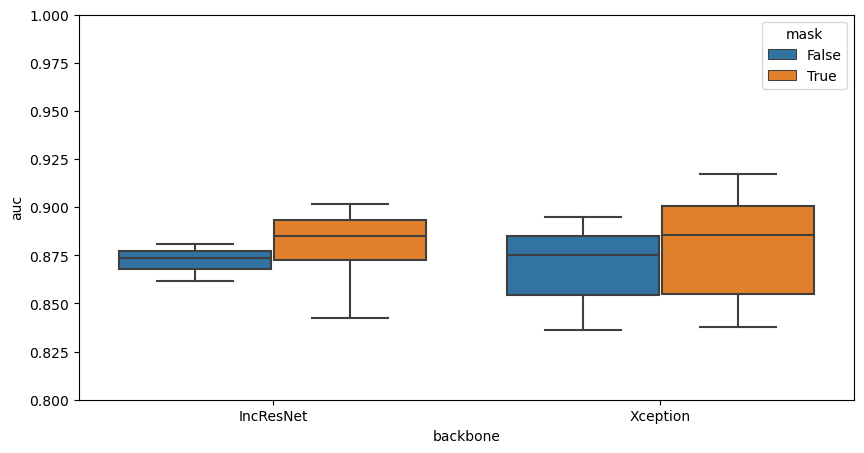

In [26]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="backbone", y=y,
                hue="mask",
                data=data)
p.set(ylim=(0.8, 1))

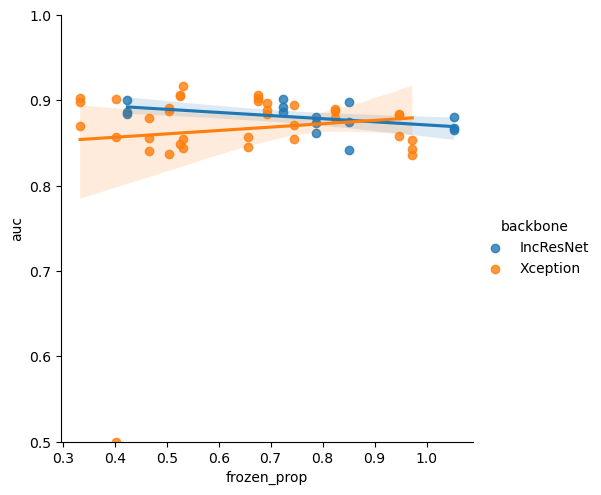

In [27]:
# plt.subplots(figsize=(10,5))
p = sns.lmplot(x="frozen_prop", y=y,
                hue="backbone",
                data=data)
p.set(ylim=(0.5, 1))

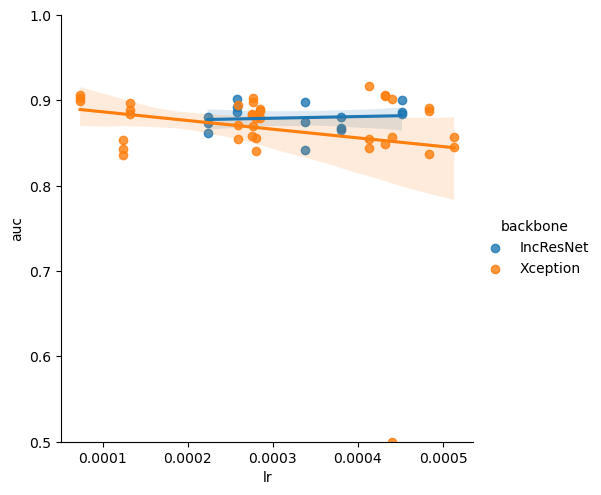

In [28]:
# plt.subplots(figsize=(10,5))
p = sns.lmplot(x="lr", y=y,
                hue="backbone",
                data=data)
p.set(ylim=(0.5, 1))

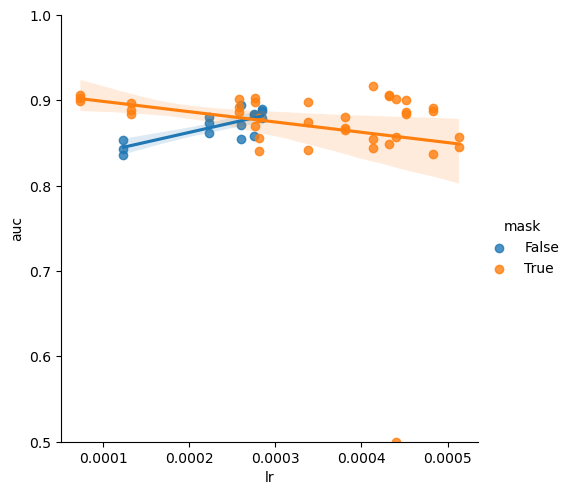

In [29]:
# plt.subplots(figsize=(10,5))
p = sns.lmplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(0.5, 1))

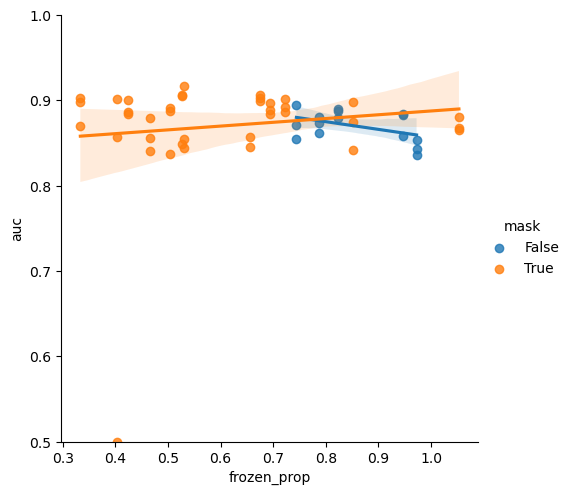

In [30]:
# plt.subplots(figsize=(10,5))
p = sns.lmplot(x="frozen_prop", y=y,
                hue="mask",
                data=data)
p.set(ylim=(0.5, 1))

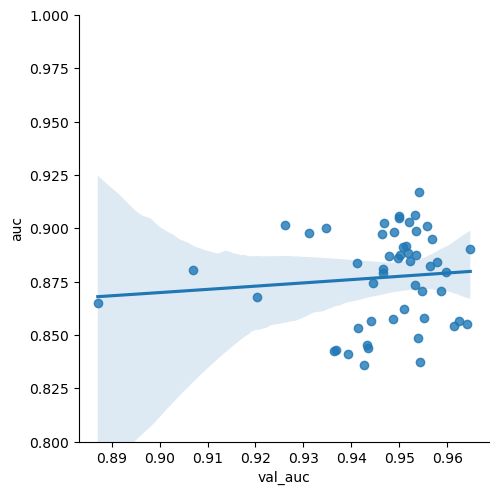

In [31]:
# plt.subplots(figsize=(10,5))
data = data[data.auc > 0.8]
p = sns.lmplot(x="val_auc", y='auc',
                data=data, order = 2)
p.set(ylim=(0.8, 1))